<a href="https://colab.research.google.com/github/joapen/ML-Learning-bucket/blob/main/marketbreadthdata_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

###  Project Definition  ###

PROJECT_ID = 'Looking for correlation between DIX, GEX and SPX'

FILEPATH = "/content/drive/MyDrive/public/DREAM/Amplitud-Mercado-2021-05-30.csv" 

used_features = ['ADVNASDAQ',
                 'ADVNASDAQVOLUMEN',
                 'DESNASDAQ',
                 'DESNASDAQVOLUMEN',
                 'NASDAQMAX',
                 'NASDAQMIN',
                 'NASDAQREP',
                 'NASDAQREPVOLUMEN',
                 'ADVNYSE',
                 'ADVNYSEVOLUMEN',
                 'DESNYSE',
                 'DESNYSEVOLUMEN',
                 'NYSEMAX',
                 'NYSEMIN',
                 'NYSEREP',
                 'NYSEREPVOLUMEN',
                 'SPXCLOSE',
                 'SPXVOLUME']

TARGET_COLUMN = 'SPXCLOSE'

print("Setup Complete")

Setup Complete


In [ ]:
###   Load data + features    ###
df = pd.read_csv(FILEPATH)

# Step 1 Shift SPXCLOSE 1 day 
dfSPXCLOSE = df.SPXCLOSE.shift(-1)
df.SPXCLOSE = dfSPXCLOSE

# after the shift(-1) the last line at least is NaN, so we remove it
df = df.dropna(axis = 0, how ='any')
df.set_index('DATE')
split_date ="2020-01-02"
train_data = df.loc[df['DATE'] <= split_date]
test_data = df.loc[df['DATE'] > split_date]

# Filter rows with missing values
train_data = train_data.dropna(axis=0)
#test_data = test_data.dropna(axis=0)

description = pd.Series(['ADVNASDAQ',
                 'ADVNASDAQVOLUMEN',
                 'DESNASDAQ',
                 'DESNASDAQVOLUMEN',
                 'NASDAQMAX',
                 'NASDAQMIN',
                 'NASDAQREP',
                 'NASDAQREPVOLUMEN',
                 'ADVNYSE',
                 'ADVNYSEVOLUMEN',
                 'DESNYSE',
                 'DESNYSEVOLUMEN',
                 'NYSEMAX',
                 'NYSEMIN',
                 'NYSEREP',
                 'NYSEREPVOLUMEN',
                 'SPXCLOSE',
                 'SPXVOLUME'])
# Choose target and features
train_y = train_data.SPXCLOSE
val_y = test_data.SPXCLOSE

train_X = train_data[used_features]
val_X = test_data[used_features]

print("Setup Complete")

Setup Complete


# 1.- Exploratory Data Analysis (EDA)

**** First 5 lines of TRAIN data:


,DATE,ADVNASDAQ,ADVNASDAQVOLUMEN,DESNASDAQ,DESNASDAQVOLUMEN,NASDAQMAX,NASDAQMIN,NASDAQREP,NASDAQREPVOLUMEN,ADVNYSE,ADVNYSEVOLUMEN,DESNYSE,DESNYSEVOLUMEN,NYSEMAX,NYSEMIN,NYSEREP,NYSEREPVOLUMEN,SPXCLOSE,SPXVOLUME
0,1979-12-31,500,10395,362,3735,100,11,1761,7590,755,14740,756,11310,84,75,469,5480,105.760002,31530000
1,1980-01-02,250,8000,1016,12798,91,24,1363,7712,442,8220,1148,29610,61,36,325,2780,105.220001,40610000
2,1980-01-03,178,6414,1174,13307,56,55,1270,6259,455,15710,1143,29160,14,63,324,5610,106.519997,50480000
3,1980-01-04,815,14608,193,2299,52,11,1612,6573,1246,31870,296,4680,47,17,329,2580,106.809998,39130000
4,1980-01-07,546,11813,293,3132,78,11,1786,7975,914,26060,625,13640,90,10,370,4800,108.949997,44500000


**** Info() data of the TRAIN data set:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10089 entries, 0 to 10088
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              10089 non-null  object 
 1   ADVNASDAQ         10089 non-null  int64  
 2   ADVNASDAQVOLUMEN  10089 non-null  int64  
 3   DESNASDAQ         10089 non-null  int64  
 4   DESNASDAQVOLUMEN  10089 non-null  int64  
 5   NASDAQMAX         10089 non-null  int64  
 6   NASDAQMIN         10089 non-null  int64  
 7   NASDAQREP         10089 non-null  int64  
 8   NASDAQREPVOLUMEN  10089 non-null  int64  
 9   ADVNYSE           10089 non-null  int64  
 10  ADVNYSEVOLUMEN    10089 non-null  int64  
 11  DESNYSE           10089 non-null  int64  
 12  DESNYSEVOLUMEN    10089 non-null  int64  
 13  NYSEMAX           10089 non-null  int64  
 14  NYSEMIN           10089 non-null  int64  
 15  NYSEREP           10089 non-null  int64  
 16  

None

**** Missing values:   ****


,missing_values (#),missing_values (%),description
0,NaN,NaN,ADVNASDAQ
1,NaN,NaN,ADVNASDAQVOLUMEN
2,NaN,NaN,DESNASDAQ
3,NaN,NaN,DESNASDAQVOLUMEN
4,NaN,NaN,NASDAQMAX
5,NaN,NaN,NASDAQMIN
6,NaN,NaN,NASDAQREP
7,NaN,NaN,NASDAQREPVOLUMEN
8,NaN,NaN,ADVNYSE
9,NaN,NaN,ADVNYSEVOLUMEN


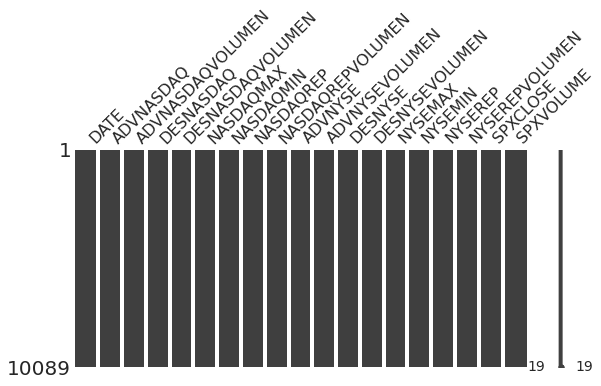

In [ ]:
####        Optional     ######

###  Display basic data for TRAINING dataset ###

print("**** First 5 lines of TRAIN data:")
display(train_data.head(5))
print("**** Info() data of the TRAIN data set:")
display(train_data.info())

# Show missing values
import missingno as msno # missin data visualization
missing_value_df = pd.DataFrame({'missing_values (#)': train_data.isnull().sum(),
                                 'missing_values (%)': round(train_data.isnull().sum() * 100 / len(train_data),2),
                                 'description': description
                                }
                               )
print("**** Missing values:   ****")
display(missing_value_df)

# show visually missing data
msno.matrix(train_data, figsize=(8, 4));

**** First 5 lines of TEST data:


,DATE,ADVNASDAQ,ADVNASDAQVOLUMEN,DESNASDAQ,DESNASDAQVOLUMEN,NASDAQMAX,NASDAQMIN,NASDAQREP,NASDAQREPVOLUMEN,ADVNYSE,ADVNYSEVOLUMEN,DESNYSE,DESNYSEVOLUMEN,NYSEMAX,NYSEMIN,NYSEREP,NYSEREPVOLUMEN,SPXCLOSE,SPXVOLUME
10089,2020-01-03,1189,1288719446,2026,1297118933,108,13,101,30495999,1387,1473906712,1543,2053583838,145,9,88,37214773,3246.280029,3461290000
10090,2020-01-06,1740,1666638365,1482,1227042883,100,29,108,45255518,1558,2134033269,1347,1725138374,125,8,117,58812948,3237.179932,3674070000
10091,2020-01-07,1444,1176714386,1767,1294621200,144,20,116,26064157,1290,1611479166,1652,1954277292,131,11,85,54568678,3253.050049,3420380000
10092,2020-01-08,1923,1450356259,1312,1080536158,212,19,115,35792305,1744,1937885932,1197,1853805514,213,12,88,83383992,3274.699951,3720890000
10093,2020-01-09,1882,1646993492,1350,948269979,259,17,129,57200352,1643,2059981783,1291,1755979401,241,13,97,35873196,3265.350098,3638390000


**** Info() data of the TEST data set:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 10089 to 10438
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              350 non-null    object 
 1   ADVNASDAQ         350 non-null    int64  
 2   ADVNASDAQVOLUMEN  350 non-null    int64  
 3   DESNASDAQ         350 non-null    int64  
 4   DESNASDAQVOLUMEN  350 non-null    int64  
 5   NASDAQMAX         350 non-null    int64  
 6   NASDAQMIN         350 non-null    int64  
 7   NASDAQREP         350 non-null    int64  
 8   NASDAQREPVOLUMEN  350 non-null    int64  
 9   ADVNYSE           350 non-null    int64  
 10  ADVNYSEVOLUMEN    350 non-null    int64  
 11  DESNYSE           350 non-null    int64  
 12  DESNYSEVOLUMEN    350 non-null    int64  
 13  NYSEMAX           350 non-null    int64  
 14  NYSEMIN           350 non-null    int64  
 15  NYSEREP           350 non-null    int64  
 16 

None

**** Missing values:   ****


,missing_values (#),missing_values (%),description
0,NaN,NaN,ADVNASDAQ
1,NaN,NaN,ADVNASDAQVOLUMEN
2,NaN,NaN,DESNASDAQ
3,NaN,NaN,DESNASDAQVOLUMEN
4,NaN,NaN,NASDAQMAX
5,NaN,NaN,NASDAQMIN
6,NaN,NaN,NASDAQREP
7,NaN,NaN,NASDAQREPVOLUMEN
8,NaN,NaN,ADVNYSE
9,NaN,NaN,ADVNYSEVOLUMEN


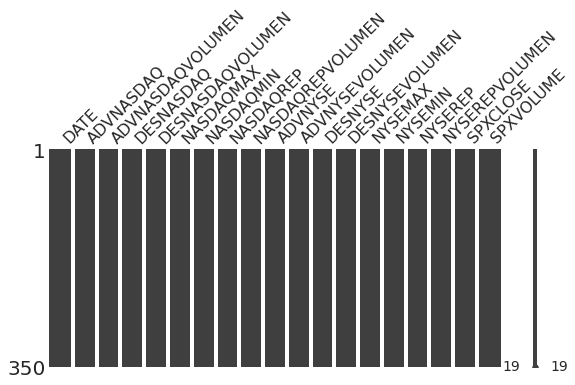

In [ ]:
####        Optional     ######

###  Display basic data for TESTING dataset ###

print("**** First 5 lines of TEST data:")
display(test_data.head(5))
print("**** Info() data of the TEST data set:")
display(test_data.info())

# Show missing values
import missingno as msno # missin data visualization
missing_value_df = pd.DataFrame({'missing_values (#)': test_data.isnull().sum(),
                                 'missing_values (%)': round(test_data.isnull().sum() * 100 / len(test_data),2),
                                 'description': description
                                }
                               )
print("**** Missing values:   ****")
display(missing_value_df)

# show visually missing data
msno.matrix(test_data, figsize=(8, 4));

### Volume of data
Training = 10.089 Testing = 350

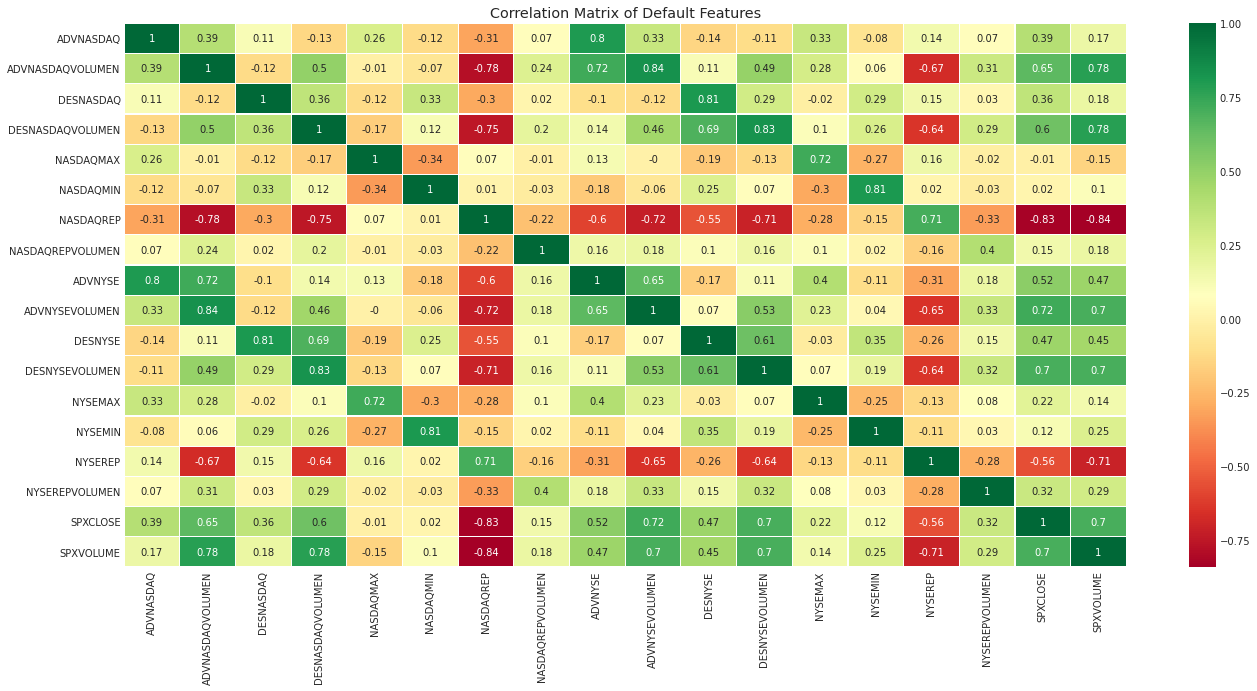

In [ ]:
####        Optional     ######
# Plot correlation heatmap of original features
import matplotlib.pyplot as pltHeatMap
fig, ax = pltHeatMap.subplots(figsize=(20, 10))
corr = train_data.corr().round(2)
sns.heatmap(corr, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
ax.set_title('Correlation Matrix of Default Features')
del corr

### Relative changes on data
Let's make a new dataframe with the percentage changes

In [ ]:
pct_change_df = pd.DataFrame(data=train_data.DATE)
pct_change_df.set_index('DATE')

for featureX in used_features:
  pct_change_df[featureX + 'DailyReturn'] = train_data[featureX].pct_change()

pct_change_df.dropna()
pct_change_df.head()


,DATE,ADVNASDAQDailyReturn,ADVNASDAQVOLUMENDailyReturn,DESNASDAQDailyReturn,DESNASDAQVOLUMENDailyReturn,NASDAQMAXDailyReturn,NASDAQMINDailyReturn,NASDAQREPDailyReturn,NASDAQREPVOLUMENDailyReturn,ADVNYSEDailyReturn,ADVNYSEVOLUMENDailyReturn,DESNYSEDailyReturn,DESNYSEVOLUMENDailyReturn,NYSEMAXDailyReturn,NYSEMINDailyReturn,NYSEREPDailyReturn,NYSEREPVOLUMENDailyReturn,SPXCLOSEDailyReturn,SPXVOLUMEDailyReturn
0,1979-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-01-02,-0.500000,-0.230399,1.806630,2.426506,-0.090000,1.181818,-0.226008,0.016074,-0.414570,-0.442334,0.518519,1.618037,-0.273810,-0.520000,-0.307036,-0.492701,-0.005106,0.287980
2,1980-01-03,-0.288000,-0.198250,0.155512,0.039772,-0.384615,1.291667,-0.068232,-0.188408,0.029412,0.911192,-0.004355,-0.015198,-0.770492,0.750000,-0.003077,1.017986,0.012355,0.243044
3,1980-01-04,3.578652,1.277518,-0.835605,-0.827234,-0.071429,-0.800000,0.269291,0.050168,1.738462,1.028644,-0.741032,-0.839506,2.357143,-0.730159,0.015432,-0.540107,0.002723,-0.224842
4,1980-01-07,-0.330061,-0.191334,0.518135,0.362331,0.500000,0.000000,0.107940,0.213297,-0.266453,-0.182303,1.111486,1.914530,0.914894,-0.411765,0.124620,0.860465,0.020036,0.137235


ADVNASDAQ
i=1
ADVNASDAQVOLUMEN
i=1
DESNASDAQ
i=1
DESNASDAQVOLUMEN
i=1
NASDAQMAX
i=1
NASDAQMIN
i=1
NASDAQREP
i=1
NASDAQREPVOLUMEN
i=1
ADVNYSE
i=1
ADVNYSEVOLUMEN
i=1
DESNYSE
i=1
DESNYSEVOLUMEN
i=1
NYSEMAX
i=1
NYSEMIN
i=1
NYSEREP
i=1
NYSEREPVOLUMEN
i=1
SPXCLOSE
i=1
SPXVOLUME
i=1


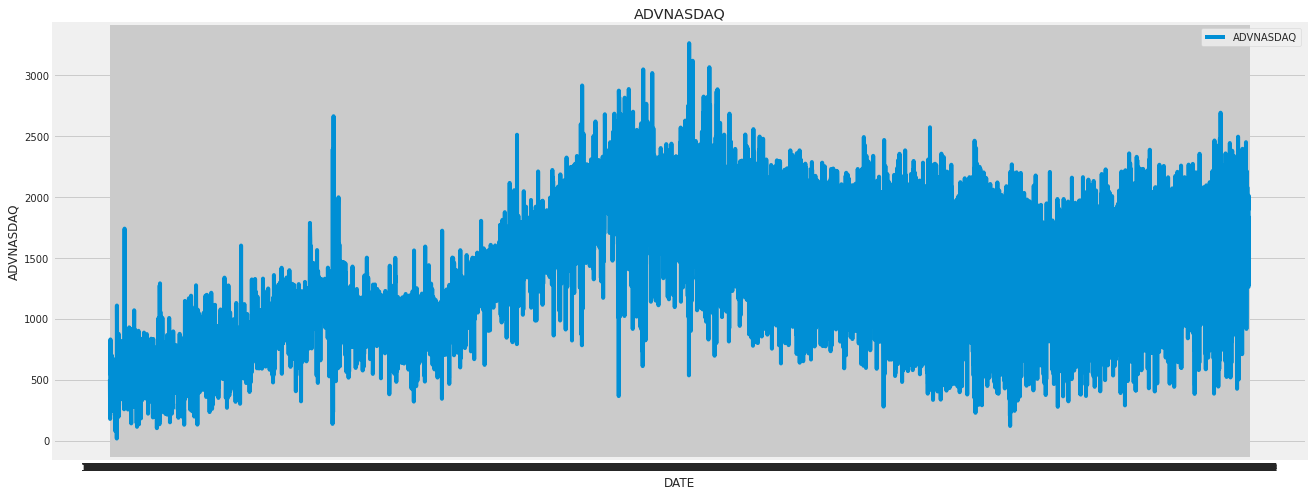

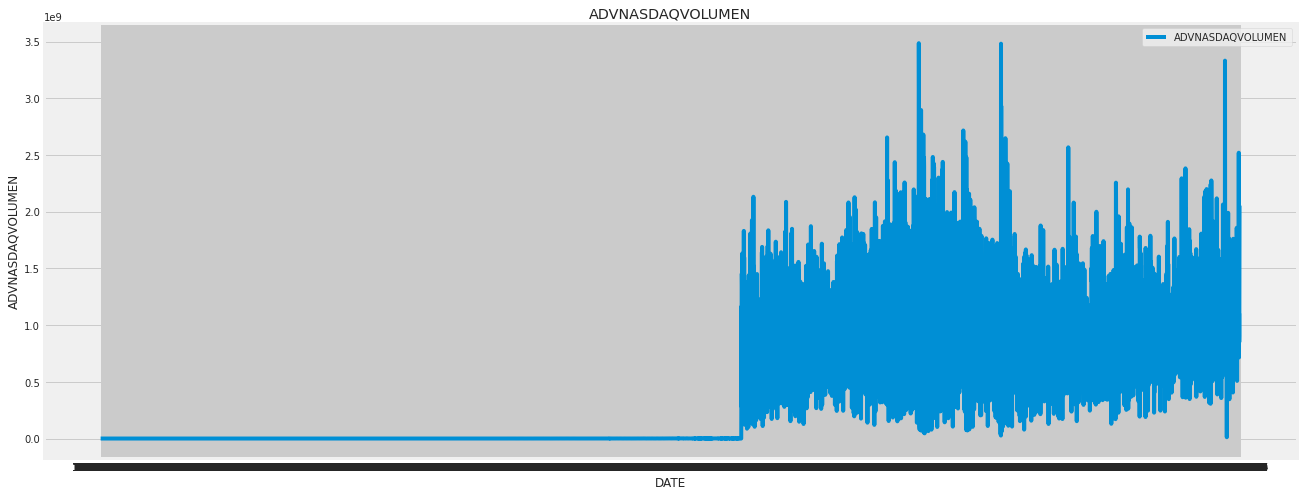

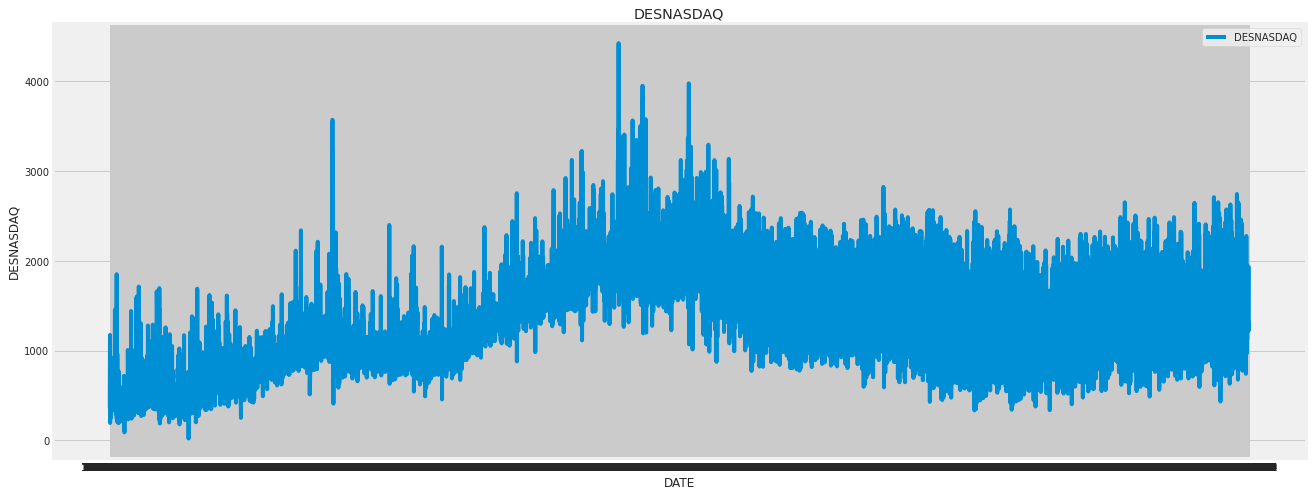

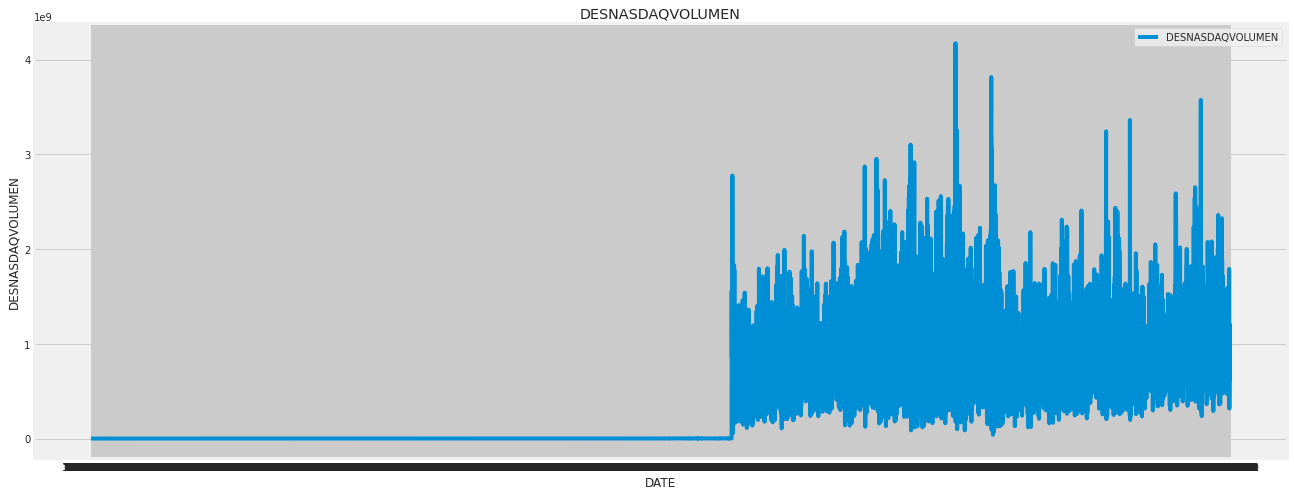

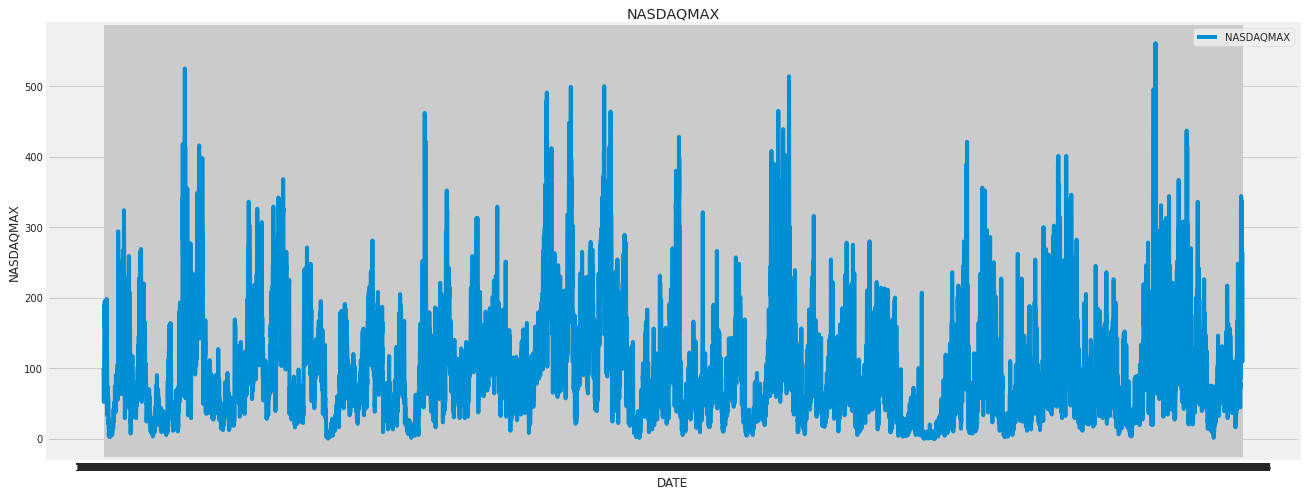

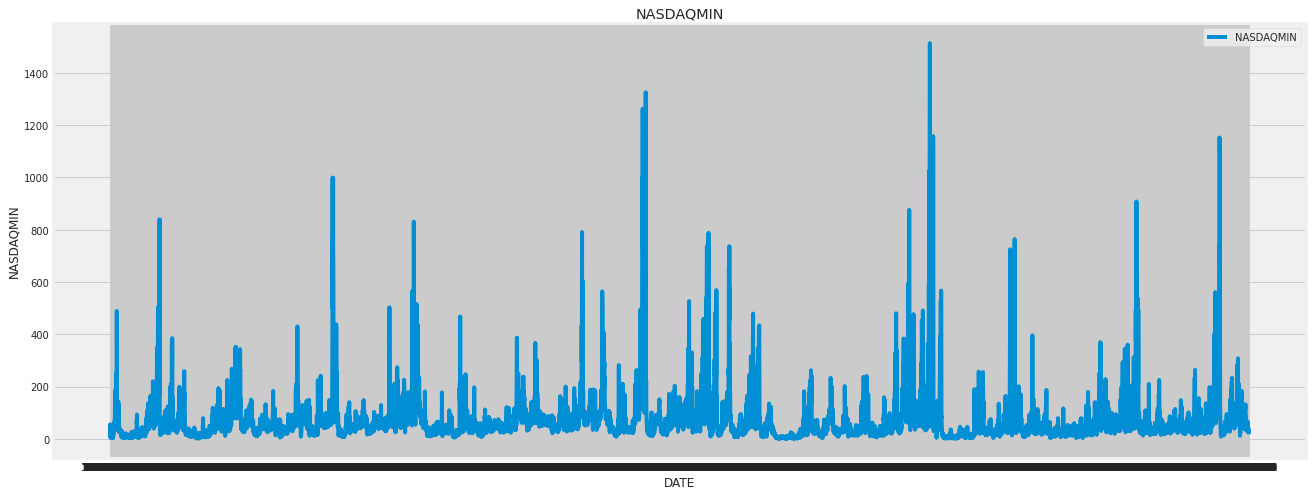

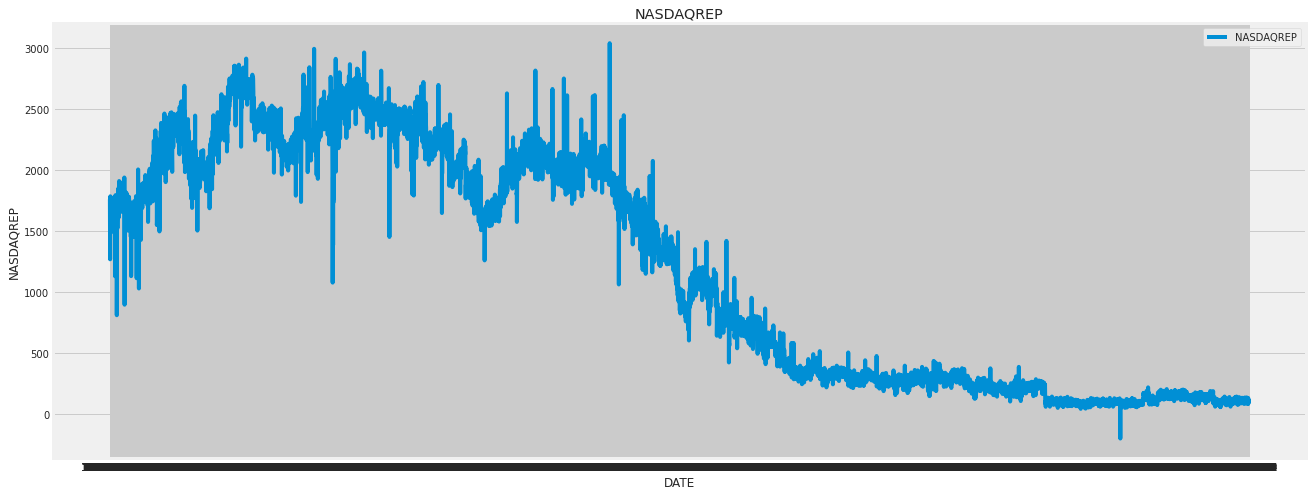

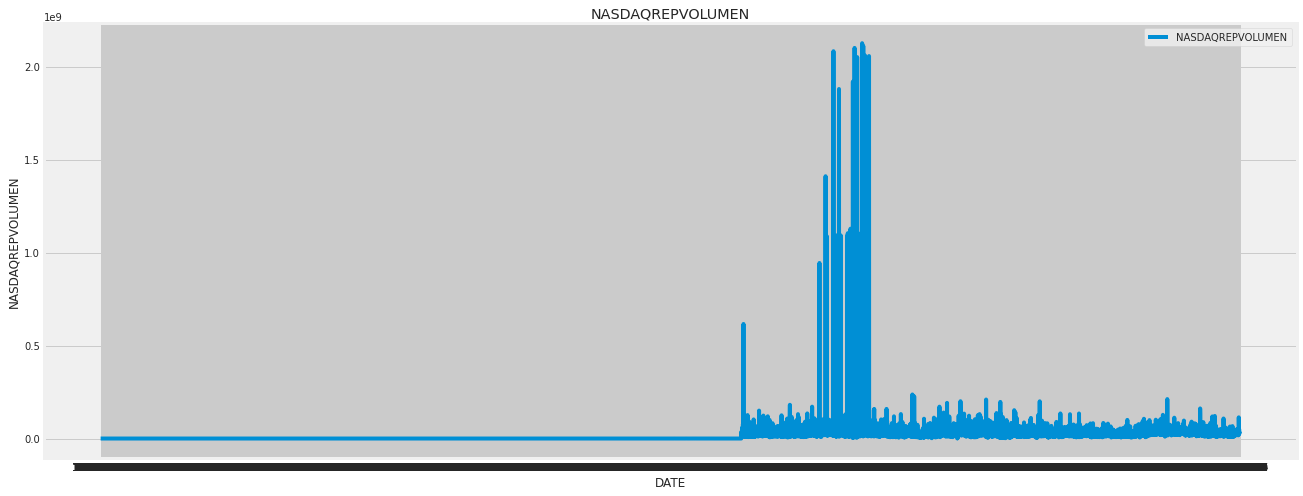

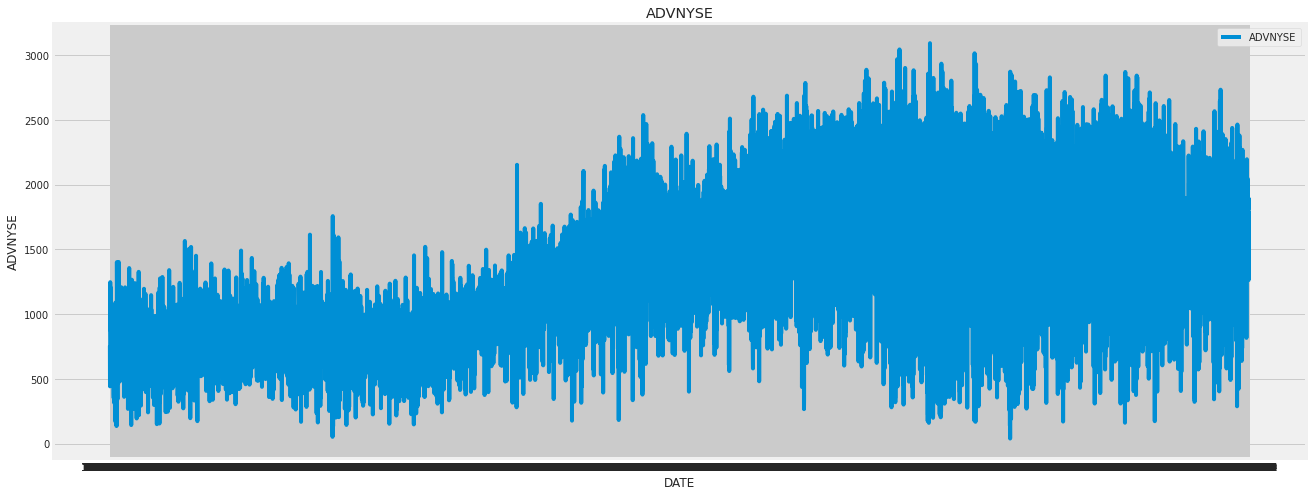

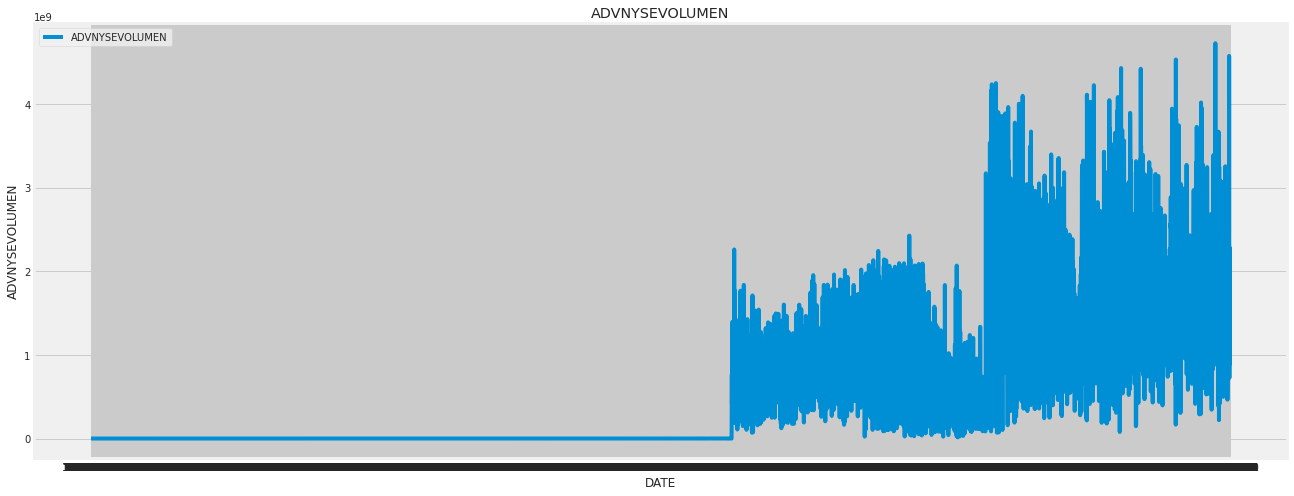

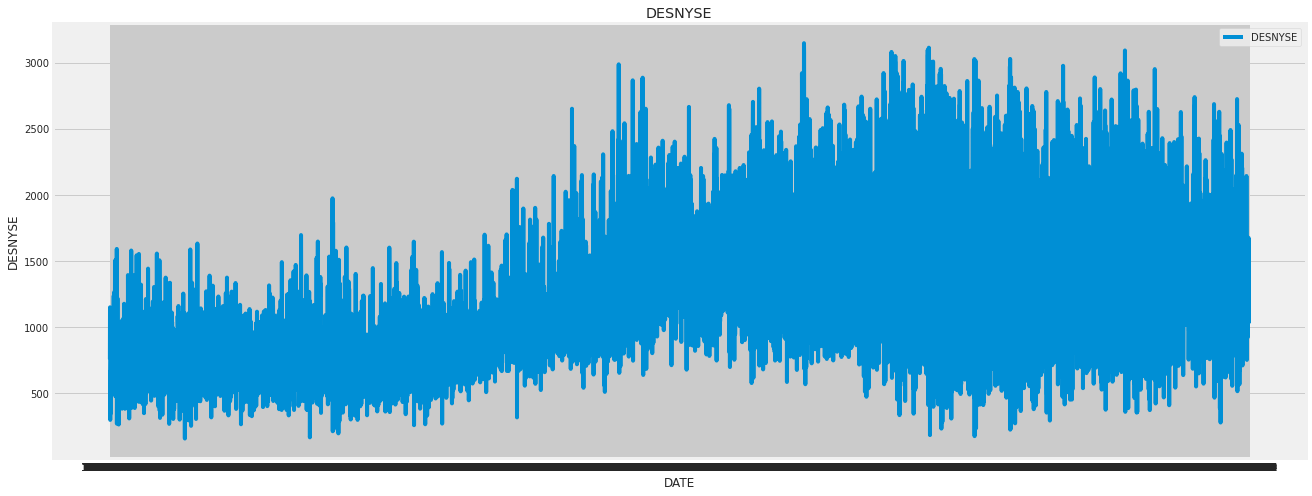

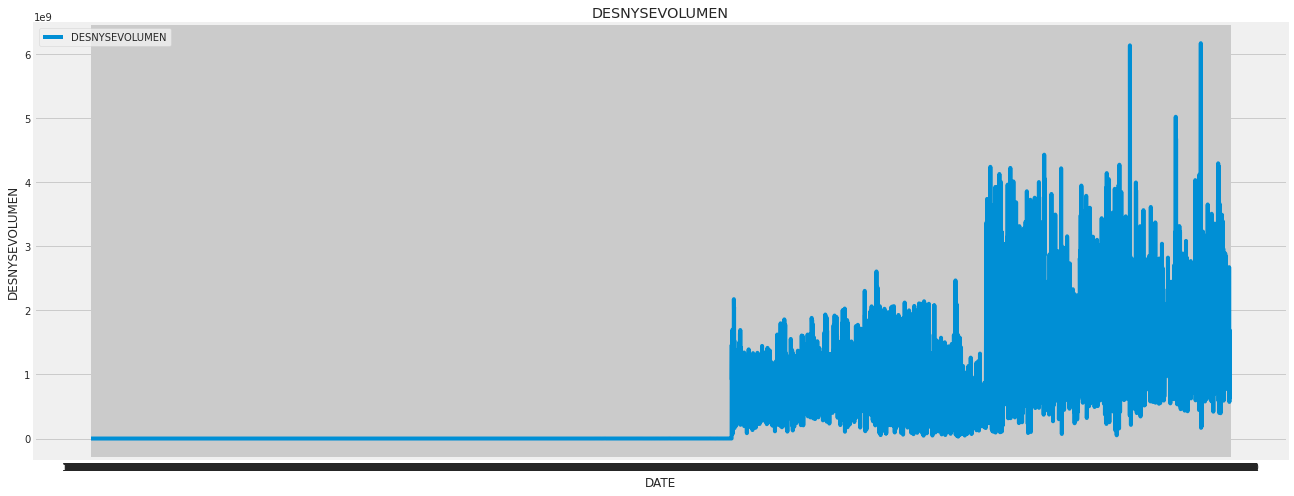

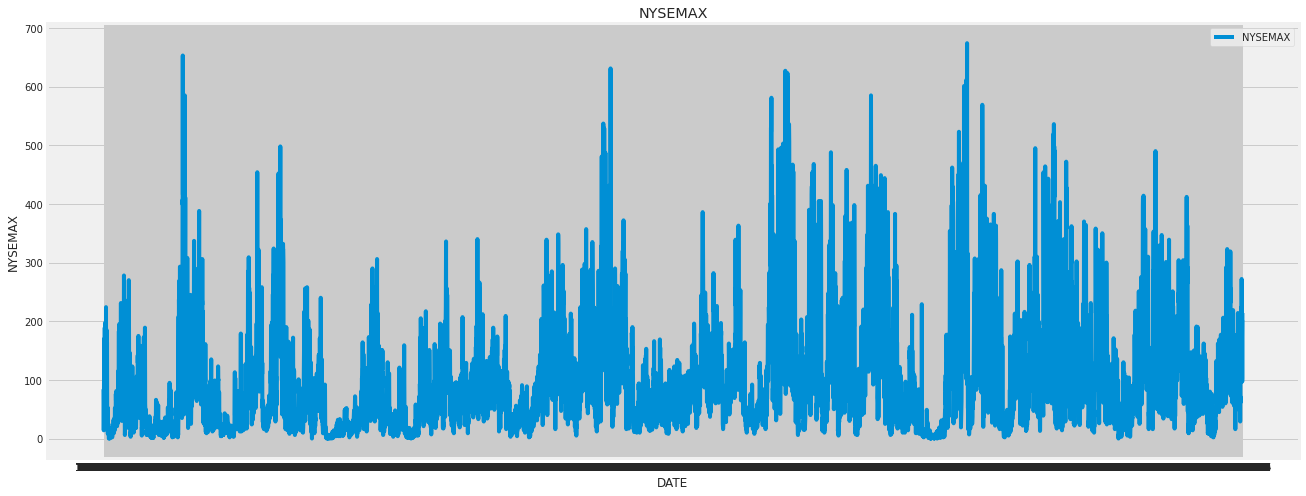

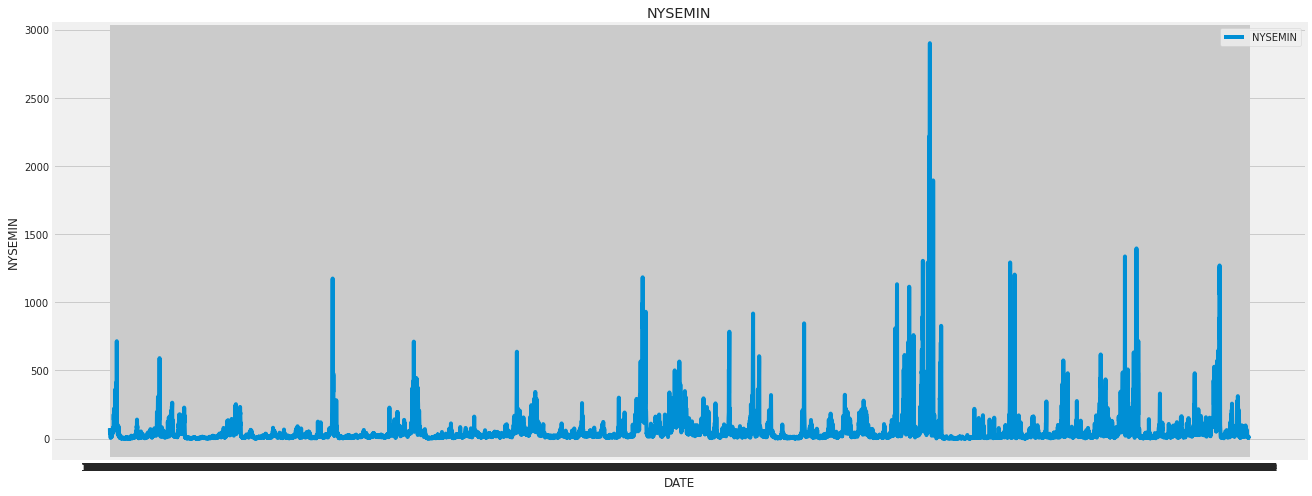

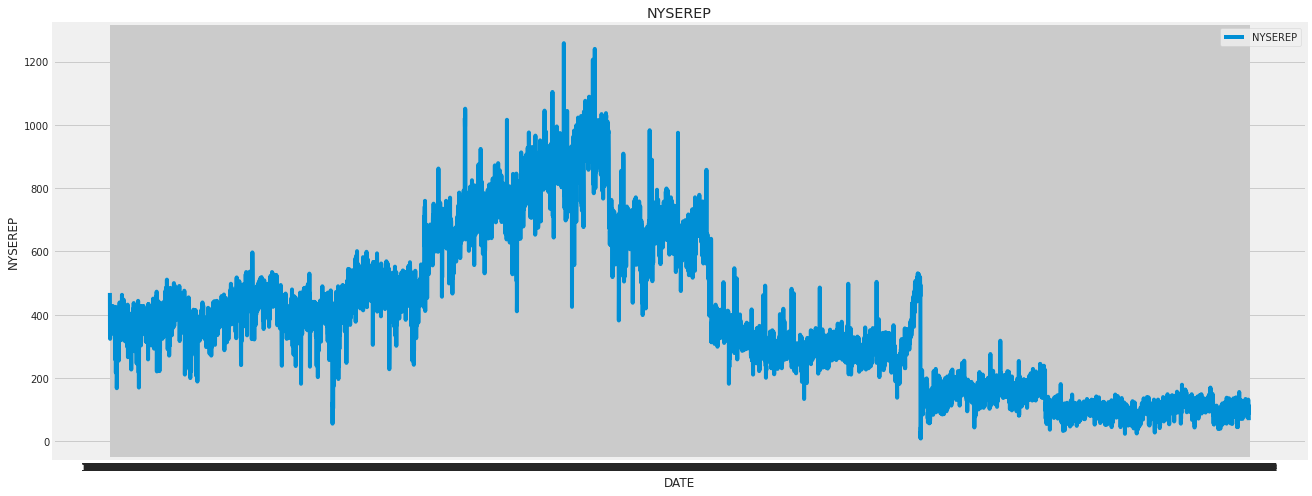

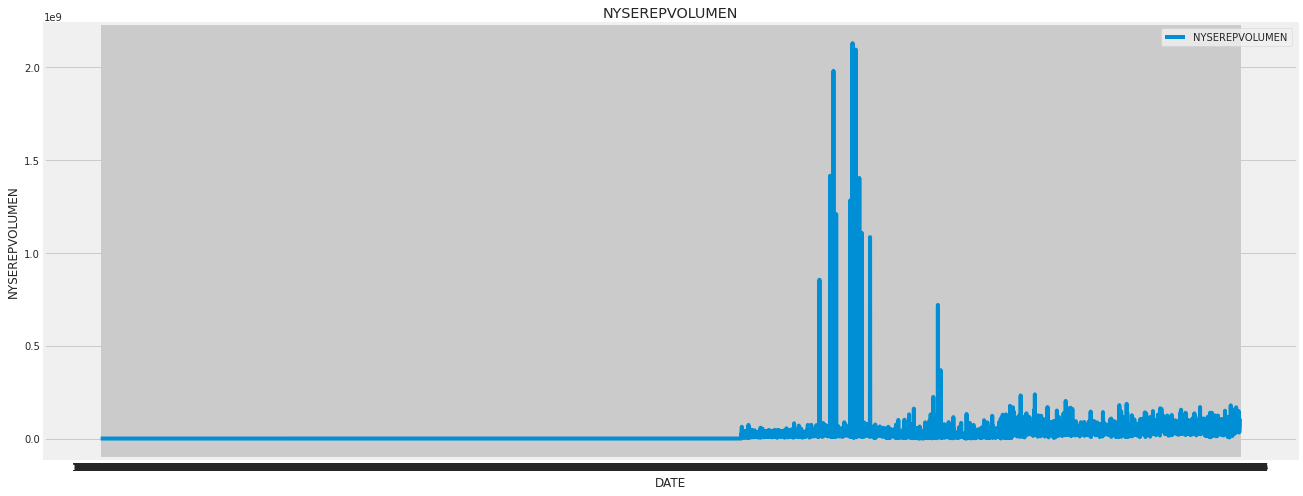

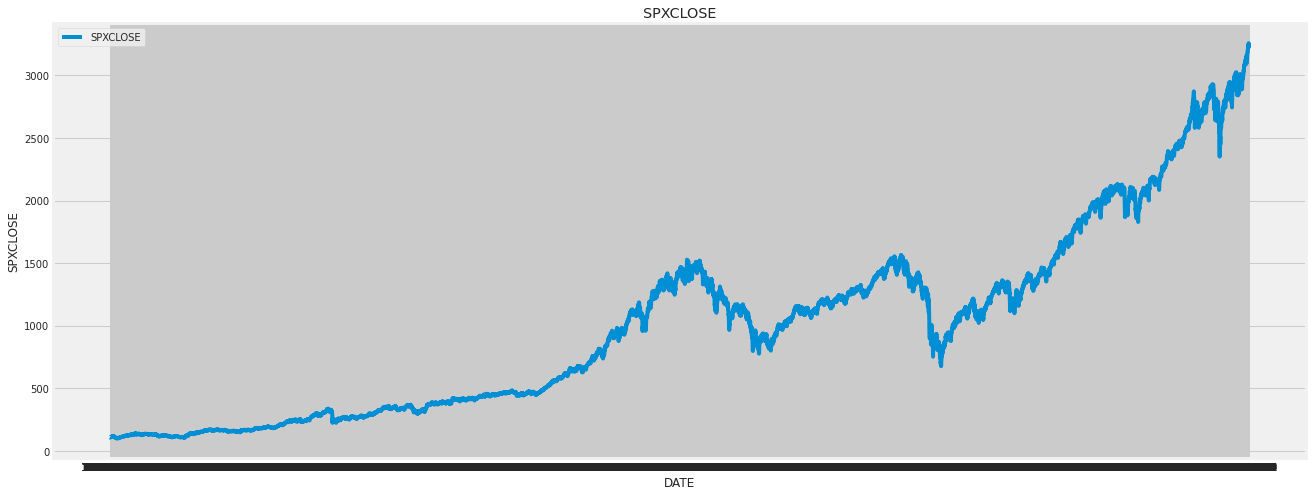

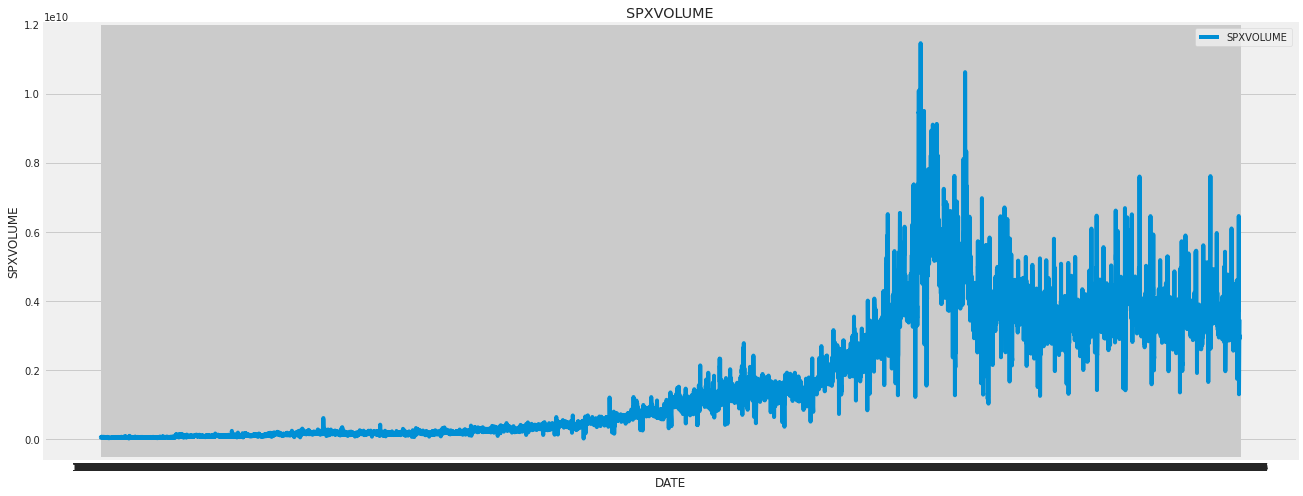

In [ ]:
# Nasty, raw drawing of data related to the percentages
# to be commented once we figure out what's cooking
i = 0
for featureV in used_features:
  print(featureV)
  plt.figure(figsize=(20,8))
  plt.title(featureV)
  sns.lineplot(data=train_data, x='DATE', y=featureV, label=featureV)
  i = +1
  print("i=" + str(i))



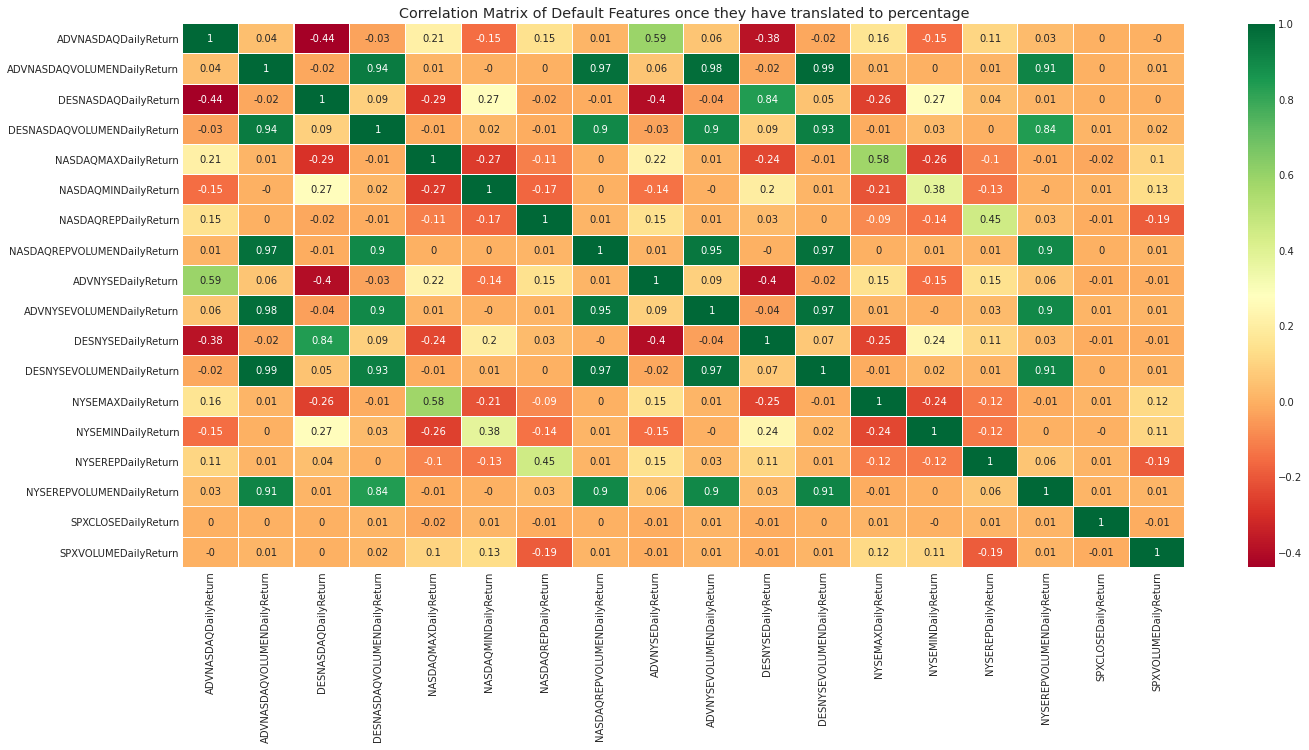

In [ ]:
####        Optional     ######
# Plot correlation heatmap of original features
import matplotlib.pyplot as pltHeatMapPct
fig, ax = pltHeatMapPct.subplots(figsize=(20, 10))
corr_pct = pct_change_df.corr().round(2)
sns.heatmap(corr_pct, ax=ax, annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
ax.set_title('Correlation Matrix of Default Features once they have translated to percentage')
del corr_pct